<a href="https://colab.research.google.com/github/riteshy7007/CNN-Projects/blob/main/FaceMaskBasicDL5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
!ls

data  drive  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image

from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split


In [7]:
with_mask_file = os.listdir('/content/data/with_mask')
print(with_mask_file[0:5])
print(with_mask_file[-5:])
without_mask_file = os.listdir('/content/data/without_mask')

['with_mask_2992.jpg', 'with_mask_2323.jpg', 'with_mask_3448.jpg', 'with_mask_2217.jpg', 'with_mask_2864.jpg']
['with_mask_3174.jpg', 'with_mask_3494.jpg', 'with_mask_3340.jpg', 'with_mask_647.jpg', 'with_mask_3612.jpg']


In [8]:
print('numberof_with_mask:',len(with_mask_file))
print('numberof_without_mask:',len(without_mask_file))

numberof_with_mask: 3725
numberof_without_mask: 3828


Basic labels when things are sorted correctly (standalone)

In [9]:
#Basic labels when things are sorted correctly (standalone)
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
print(with_mask_labels)
print(without_mask_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
labels = with_mask_labels + without_mask_labels
len(labels)
print (labels[0:5])
print (labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


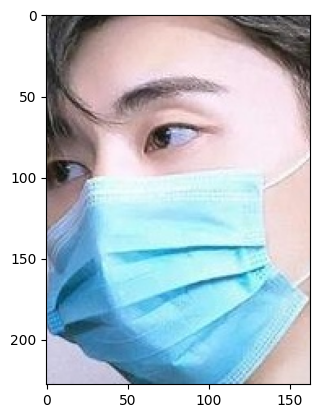

In [11]:
# checking the image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
img_plot = plt.imshow(img)
plt.show()

In [12]:
# converting img into numpy array +

with_img_path = '/content/data/with_mask/'

data = []

for i in with_mask_file:
  image = Image.open(with_img_path + i)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_img_path = '/content/data/without_mask/'
for i in without_mask_file:
    image = Image.open(without_img_path + i)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
type(data[0])

numpy.ndarray

In [14]:
X = np.array(data)
Y = np.array(labels)

In [15]:
type(X)

numpy.ndarray

In [16]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [18]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
num_of_classes = 10
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#complie the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [21]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 169s 969ms/step - acc: 0.6024 - loss: 1.0993 - val_acc: 0.8860 - val_loss: 0.2984
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 167s 979ms/step - acc: 0.8633 - loss: 0.3804 - val_acc: 0.9025 - val_loss: 0.2326
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - acc: 0.8842 - loss: 0.3108 - val_acc: 0.9124 - val_loss: 0.2043
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 182s 895ms/step - acc: 0.9028 - loss: 0.2721 - val_acc: 0.9190 - val_loss: 0.2139
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 188s 811ms/step - acc: 0.9243 - loss: 0.2189 - val_acc: 0.9174 - val_loss: 0.2209


In [22]:
# prompt: model evlauation

model.evaluate(X_test_scaled, Y_test)


48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - acc: 0.9178 - loss: 0.2048


[0.21257273852825165, 0.9205824136734009]

In [23]:
 loss, accuracy =model.evaluate(X_test_scaled, Y_test)
 print ('Test accuracy:', accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - acc: 0.9178 - loss: 0.2048
Test accuracy: 0.9205824136734009


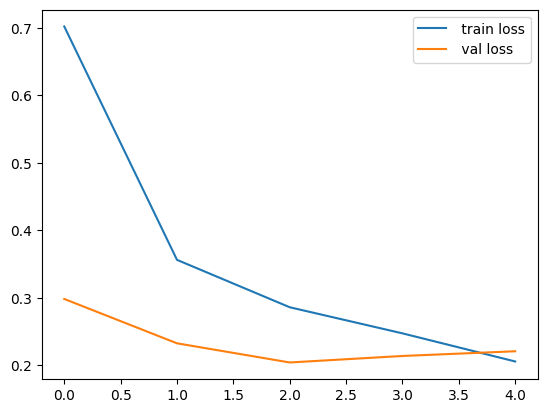

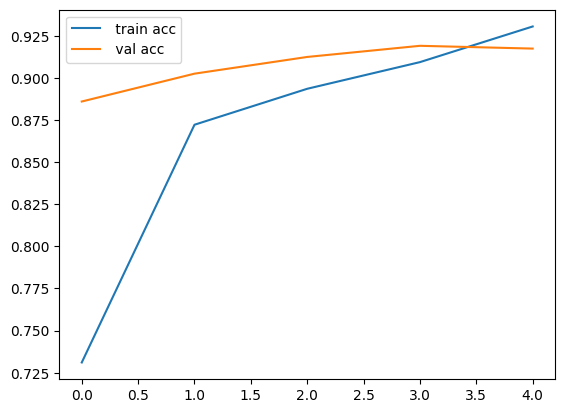

In [24]:
h = history
#plot the loss value

plt.plot(h.history['loss'],label =' train loss')
plt.plot(h.history['val_loss'],label =' val loss')
plt.legend()
plt.show()

#plot the accuracy value

plt.plot(h.history['acc'],label =' train acc')
plt.plot(h.history['val_acc'],label =' val acc')
plt.legend()
plt.show()


img_path to be predicted/content/mask.png


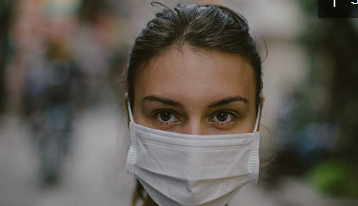

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
[[0.97254276 0.99512225 0.04085558 0.01926189 0.02873585 0.00382641
  0.00196542 0.03375161 0.00617223 0.05207743]]
1
the person in the image is with mask


In [25]:
#predictive
input_image_path =input('img_path to be predicted')

input_image =cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('the person in the image is without mask')
else:
  print('the person in the image is with mask')